<a href="https://colab.research.google.com/github/Nouraalm1/Matrix-Group/blob/main/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!zip -r Dataset.zip Dataset/

In [ ]:
# Library for handling the operating system and files
import os
# Path to the images
images_dir = "Dataset/"

In [ ]:
# List of class names
classes = os.listdir(images_dir)
# Number of classes
count_classes = len(classes)
# Display the classes
classes

['ArmsFlapping', 'FingerWiggling']

In [ ]:
# Calculating the distribution of images across classes
total = 0
dict = {}

# Iterating through subfolders
for folder in os.listdir(images_dir):
    # Counting the number of files in the folder
    c_total = len(os.listdir(images_dir + folder))
    # Adding to the dictionary
    dict[folder] = c_total
    # Cumulative total
    total = total + c_total

# Displaying the results
print("Total images: ", total)
print("Count of images in each class: ", dict)


Total images:  632
Count of images in each class:  {'ArmsFlapping': 355, 'FingerWiggling': 277}


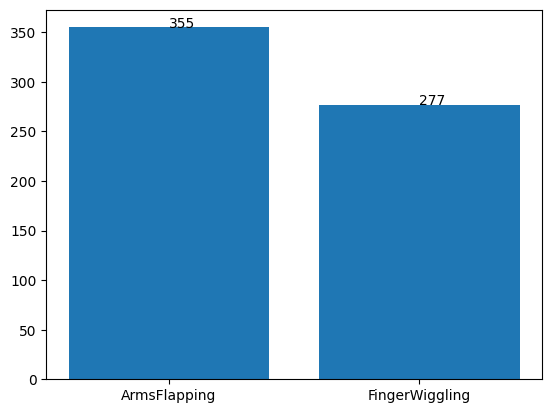

In [ ]:
# Plotting library
import matplotlib.pyplot as plt
import numpy as np

# Classes
classes = list(dict.keys())

# Counts
classes_count = list(dict.values())

# Adding counts on top of the bars
for i in range(len(classes)):
    plt.text(i, classes_count[i], classes_count[i])

# Drawing the bars
plt.bar(range(len(dict)), classes_count, tick_label=classes)
plt.show()


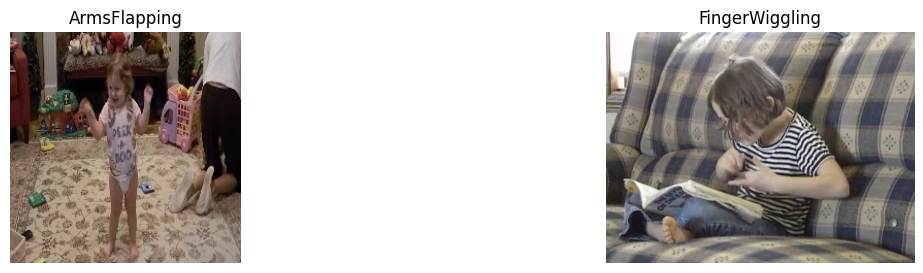

In [ ]:
# Python Imaging Library
# Install Pillow using: pip install Pillow
from PIL import Image

# Creating a figure with one row and five columns
fig, axs = plt.subplots(1, len(classes), figsize=(15, 3))

# Iterating over folders named by classes
for i, class_name in enumerate(classes):
    # List of files in the folder
    class_images = os.listdir(os.path.join(images_dir, class_name))
    # Path of the first image in the folder
    img_path = os.path.join(images_dir, class_name, class_images[0])
    # Load the image
    img = Image.open(img_path)
    # Display the image
    axs[i].imshow(img, cmap='gray')
    # Set the title of the image
    axs[i].set_title(class_name)
    # Turn off the axes
    axs[i].axis('off')

plt.show()


In [ ]:
# Defining the dimensions of the images
Image_Height = 224
Image_Width = 224

# Desired image dimensions
target_size = (Image_Height, Image_Width)


In [ ]:
# List of image file names
image_files = []

# List of corresponding class labels
labels = []

# Populating the lists
for root, dirs, files in os.walk(images_dir):
    for file in files:
        # Checking for image file extensions
        if file.endswith(('.jpg', '.jpeg', '.png')):
            # Adding to the list of file names
            image_files.append(os.path.join(root, file))
            # Adding the class name
            labels.append(os.path.basename(root))


In [ ]:
print(image_files[0])
print(labels[0])

Dataset/ArmsFlapping\ArmFlapping_32_frame_0.jpg
ArmsFlapping


In [ ]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42)


In [ ]:
# Loading and pre-processing an image
def load_and_preprocess_image(image_path, target_size):
    # Load the image
    img = Image.open(image_path)
    # Convert to RGB if not already
    img = img.convert('RGB') if img.mode != 'RGB' else img
    # Resize the image
    img = img.resize(target_size)
    # Convert to a NumPy array and normalize the image
    img = np.array(img) / 255.0
    return img


In [ ]:
# Applying the previous function
X_train_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_train])
X_test_processed = np.array([load_and_preprocess_image(image_path, target_size) for image_path in X_test])


In [ ]:
# Library for class labels encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Encoding test labels
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded


array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# List of class names indexed according to the encoding
classes_labels = []

for i in range(count_classes):
    class_label = label_encoder.inverse_transform([i])
    classes_labels.append(class_label[0])

classes_labels


['ArmsFlapping', 'FingerWiggling']

In [ ]:
# Library for converting encoding to categorical
from keras.utils import to_categorical

# Convert training encoding to categorical
y_train_categorical = to_categorical(y_train_encoded)

# Convert test encoding to categorical
y_test_categorical = to_categorical(y_test_encoded)
y_test_categorical


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [ ]:
# Setting seed for reproducibility
import random
import numpy as np
import tensorflow as tf

# Any number can be used for the seed value
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)


In [ ]:
import pandas as pd
from keras.applications import VGG16, ResNet50, InceptionV3, MobileNet, Xception, DenseNet121
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Function to create and train a model
def train_model(base_model, X_train, y_train, X_test, y_test, epochs=10):
    model = Sequential([
        Input(shape=(Image_Height, Image_Width, 3)),
        base_model,
        Flatten(),
        Dropout(0.4),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(count_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test)
    return round(score[1] * 100, 2)

# List of pre-trained models to evaluate
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False),
    "ResNet50": ResNet50(weights='imagenet', include_top=False),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False),
    "MobileNet": MobileNet(weights='imagenet', include_top=False),
    "Xception": Xception(weights='imagenet', include_top=False),
    "DenseNet121": DenseNet121(weights='imagenet', include_top=False)
}

# Freezing layers in the base models
for model in models.values():
    for layer in model.layers:
        layer.trainable = False

# Dictionary to hold accuracy of each model
accuracies = {}
epochs=10
# Loop over models
for model_name, base_model in models.items():
    print(f"Training and evaluating {model_name}")
    acc = train_model(base_model, X_train_processed, y_train_categorical, X_test_processed, y_test_categorical, epochs)
    accuracies[model_name] = acc

# Creating and displaying the dataframe
df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
df.to_csv("CompareModels.csv")
print(df)


Training and evaluating VGG16
Epoch 1/10
14/14 [==============================] - 56s 4s/step - loss: 1.4760 - accuracy: 0.5452 - val_loss: 0.9447 - val_accuracy: 0.6684
Epoch 2/10
14/14 [==============================] - 54s 4s/step - loss: 1.1528 - accuracy: 0.6425 - val_loss: 0.4246 - val_accuracy: 0.8263
Epoch 3/10
14/14 [==============================] - 55s 4s/step - loss: 0.6361 - accuracy: 0.7511 - val_loss: 0.3289 - val_accuracy: 0.8632
Epoch 4/10
14/14 [==============================] - 54s 4s/step - loss: 0.4070 - accuracy: 0.8439 - val_loss: 0.1810 - val_accuracy: 0.9000
Epoch 5/10
14/14 [==============================] - 52s 4s/step - loss: 0.2633 - accuracy: 0.9027 - val_loss: 0.1720 - val_accuracy: 0.9000
Epoch 6/10
14/14 [==============================] - 54s 4s/step - loss: 0.2388 - accuracy: 0.9163 - val_loss: 0.0864 - val_accuracy: 0.9789
Epoch 7/10
14/14 [==============================] - 52s 4s/step - loss: 0.1321 - accuracy: 0.9525 - val_loss: 0.0586 - val_accurac

In [ ]:
# Importing the VGG16 model from Keras applications
from keras.applications import VGG16

# Loading the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(Image_Height, Image_Width, 3))

# Freezing all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

print("Layers: ", len(base_model.layers))
base_model.summary()


Layers:  19
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128) 

In [ ]:
# Importing necessary modules
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Sequential model
model = Sequential()

# Input layer
model.add(Input(shape=(Image_Height, Image_Width, 3)))

# Adding the pre-trained model
model.add(base_model)

# Flatten layer
model.add(Flatten())

# Dropout layer
model.add(Dropout(0.4))

# Dense layer
model.add(Dense(512, activation='relu'))

# Dropout layer
model.add(Dropout(0.4))

# Dense layer
model.add(Dense(256, activation='relu'))

# Dropout layer
model.add(Dropout(0.4))

# Dense layer
model.add(Dense(128, activation='relu'))

# Dropout layer
model.add(Dropout(0.4))

# Dense layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(count_classes, activation='softmax'))

# Configuring the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_32 (Dropout)        (None, 25088)             0         
                                                                 
 dense_40 (Dense)            (None, 512)               12845568  
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dropout_34 (Dropout)        (None, 256)              

In [ ]:
# Training the model
epochs = 10
history = model.fit(
    X_train_processed,
    y_train_categorical,
    epochs=epochs,
    validation_data=(X_test_processed, y_test_categorical)
)


Epoch 1/10
14/14 [==============================] - 60s 4s/step - loss: 1.6756 - accuracy: 0.5317 - val_loss: 0.5831 - val_accuracy: 0.7263
Epoch 2/10
14/14 [==============================] - 55s 4s/step - loss: 1.3493 - accuracy: 0.5566 - val_loss: 0.5656 - val_accuracy: 0.7526
Epoch 3/10
14/14 [==============================] - 55s 4s/step - loss: 0.8469 - accuracy: 0.6335 - val_loss: 0.6590 - val_accuracy: 0.5105
Epoch 4/10
14/14 [==============================] - 55s 4s/step - loss: 0.6045 - accuracy: 0.7127 - val_loss: 0.3650 - val_accuracy: 0.8789
Epoch 5/10
14/14 [==============================] - 55s 4s/step - loss: 0.3616 - accuracy: 0.8462 - val_loss: 0.2371 - val_accuracy: 0.9263
Epoch 6/10
14/14 [==============================] - 55s 4s/step - loss: 0.2399 - accuracy: 0.9095 - val_loss: 0.1407 - val_accuracy: 0.9421
Epoch 7/10
14/14 [==============================] - 55s 4s/step - loss: 0.1364 - accuracy: 0.9502 - val_loss: 0.0883 - val_accuracy: 0.9579
Epoch 8/10
14/14 [==

In [ ]:
# Evaluating the model

score = model.evaluate(X_test_processed, y_test_categorical)
print('Test accuracy:', round(score[1] * 100, 2))


6/6 [==============================] - 16s 3s/step - loss: 0.0346 - accuracy: 0.9789
Test accuracy: 97.89


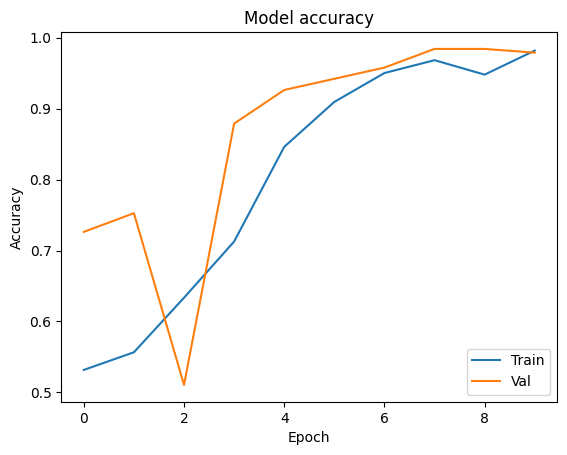

In [ ]:
# Visualizing training and validation accuracy over epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
# Making predictions on the evaluation data
y_pred = model.predict(X_test_processed)


6/6 [==============================] - 16s 3s/step


In [ ]:
# Converting from class probabilities to their encoding
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# Finding class labels corresponding to the encodings
pred_class_labels = []
for c in y_pred:
    pred_class_labels.append(label_encoder.inverse_transform([c])[0])

pred_class_labels


['ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'FingerWiggling',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'FingerWiggling',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'FingerWiggling',
 'FingerWiggling',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'ArmsFlapping',
 'FingerWiggling',
 'FingerWiggling',
 'ArmsFlappi

In [ ]:
# Importing confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
cm = confusion_matrix(y_test, pred_class_labels)
cm


array([[122,   3],
       [  1,  64]], dtype=int64)

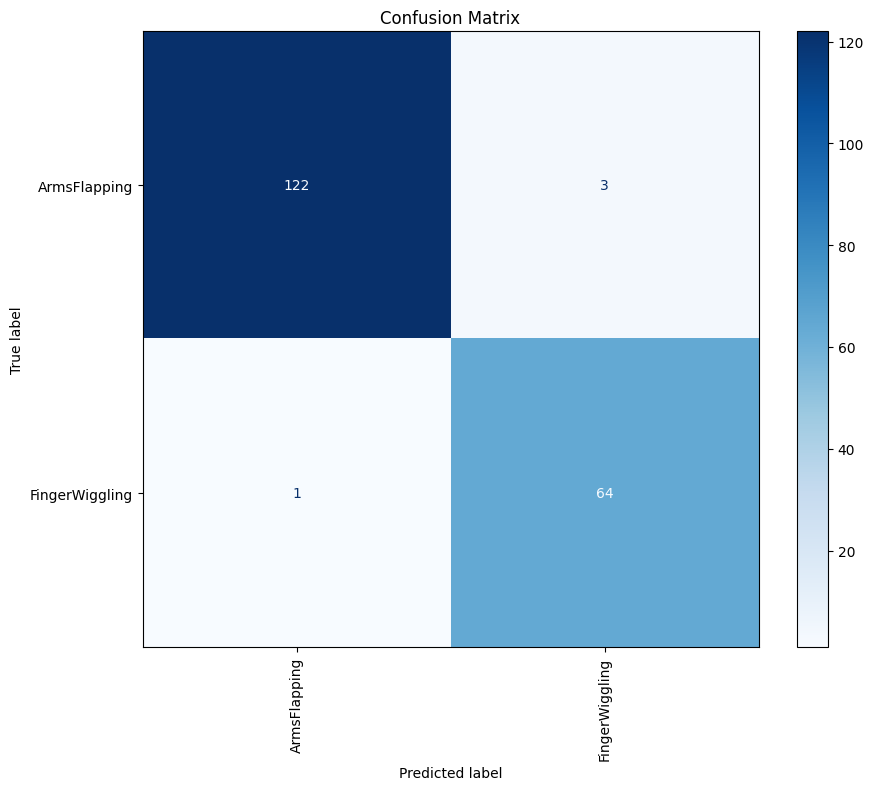

In [ ]:
# Importing ConfusionMatrixDisplay and matplotlib.pyplot
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Drawing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_labels)
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)

# Rotating the labels on the horizontal axis vertically
ax.set_xticklabels(classes_labels, rotation=90)

plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the model to a file
model.save('ASD.h5')


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
